In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import logging
from classes.optimal_catboost import OptimalCatBoostClassifier

def generate_dataset():
    X, y = make_classification(
        n_samples=1000, 
        n_features=10, 
        n_informative=5, 
        n_redundant=2, 
        n_classes=3, 
        random_state=42
    )
    cat_features = [f"cat_{i}" for i in range(3)]  # Categorical feature names
    num_features = [f"num_{i}" for i in range(7)]  # Numerical feature names
    
    X_df = pd.DataFrame(X, columns=num_features + cat_features)
    # Add some fake categorical data
    for cat in cat_features:
        X_df[cat] = np.random.choice(["A", "B", "C"], size=X_df.shape[0])
    
    y_df = pd.Series(y, name="target")
    return X_df, y_df, num_features, cat_features

param_grid = {
    "iterations": [100, 300],
    "depth": [4, 6],
    "learning_rate": (0.01, 0.1),
    "l2_leaf_reg": (1, 5),
}

X, y, num_features, cat_features = generate_dataset()

model = OptimalCatBoostClassifier(
    features=num_features + cat_features,
    param_grid=param_grid,
    n_trials=10,
    cat_features=cat_features,
    cache_path=None,
)
    
model.fit(X, y)
    
#     evaluation_results = model.evaluate(X_test, y_test)
#     print("Evaluation Metrics:\n", evaluation_results)
    
#     # Generate classification report
#     y_pred = model.predict(X_test)
#     report = classification_report(y_test, y_pred)
#     print("\nClassification Report:\n", report)
    
#     # Plot feature importance
#     LOGGER.info("Plotting feature importance...")
#     model.plot_feature_importance()

# # Run the debugging function
# if __name__ == "__main__":
#     debug_optimal_catboost()


[I 2024-12-05 00:10:07,496] A new study created in memory with name: catboost_optimization
[I 2024-12-05 00:10:09,151] Trial 0 finished with value: 0.7301249577902343 and parameters: {'iterations': 100, 'depth': 6, 'learning_rate': 0.017162317196174164, 'l2_leaf_reg': 4.42029769878453}. Best is trial 0 with value: 0.7301249577902343.
[I 2024-12-05 00:10:10,110] Trial 1 finished with value: 0.7302807463952502 and parameters: {'iterations': 100, 'depth': 4, 'learning_rate': 0.025784883775089022, 'l2_leaf_reg': 3.791040261314456}. Best is trial 1 with value: 0.7302807463952502.
[I 2024-12-05 00:10:10,720] Trial 2 finished with value: 0.7303695552072728 and parameters: {'iterations': 100, 'depth': 4, 'learning_rate': 0.04982829005390572, 'l2_leaf_reg': 4.737439529773209}. Best is trial 2 with value: 0.7303695552072728.
[I 2024-12-05 00:10:12,542] Trial 3 finished with value: 0.7452912647582134 and parameters: {'iterations': 100, 'depth': 6, 'learning_rate': 0.059859715176215654, 'l2_leaf_r

In [3]:
model.training_results_

,Metric,Score
0,Accuracy,0.960000
1,F1 Score,0.959943
2,Precision,0.961218
3,Recall,0.960000


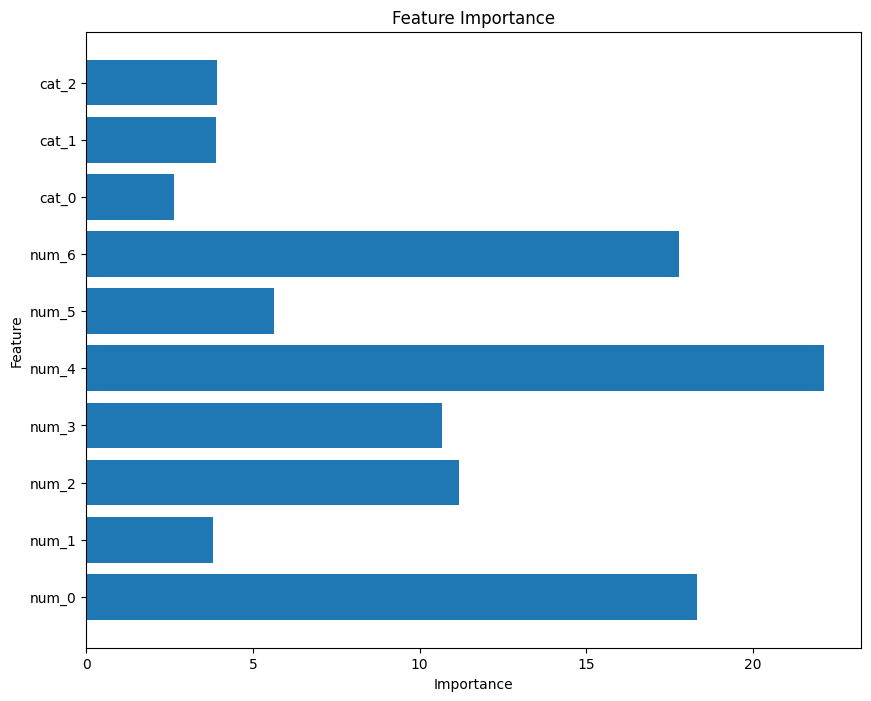

In [4]:
model.plot_feature_importance()

# Regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import logging
from classes.optimal_catboost import OptimalCatBoostRegressor  # Assumes you have an equivalent for regression

def generate_regression_dataset():
    X, y = make_regression(
        n_samples=1000,
        n_features=10,
        n_informative=7,
        noise=0.1,
        random_state=42,
    )
    cat_features = [f"cat_{i}" for i in range(3)]  # Categorical feature names
    num_features = [f"num_{i}" for i in range(7)]  # Numerical feature names

    X_df = pd.DataFrame(X, columns=num_features + cat_features)
    # Add some fake categorical data
    for cat in cat_features:
        X_df[cat] = np.random.choice(["A", "B", "C"], size=X_df.shape[0])

    y_df = pd.Series(y, name="target")
    return X_df, y_df, num_features, cat_features

# Define the parameter grid for the CatBoost regressor
param_grid = {
    "iterations": [100, 300],
    "depth": [4, 6],
    "learning_rate": (0.01, 0.1),
    "l2_leaf_reg": (1, 5),
}

# Generate the dataset
X, y, num_features, cat_features = generate_regression_dataset()

# Initialize the OptimalCatBoostRegressor
model = OptimalCatBoostRegressor(
    features=num_features + cat_features,
    param_grid=param_grid,
    n_trials=10,
    cat_features=cat_features,
    cache_path=None,
)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X, y)

# # Evaluate the model
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# # Print evaluation metrics
# print("Regression Metrics:")
# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"R-Squared (R2): {r2:.4f}")

# # Optional: Plot feature importance
# logging.info("Plotting feature importance...")
# model.plot_feature_importance()


[I 2024-12-05 00:10:50,419] A new study created in memory with name: catboost_regressor_optimization
[I 2024-12-05 00:10:51,890] Trial 0 finished with value: 39.12805627107806 and parameters: {'iterations': 300, 'depth': 4, 'learning_rate': 0.07356883181720497, 'l2_leaf_reg': 1.575519955188402}. Best is trial 0 with value: 39.12805627107806.
[I 2024-12-05 00:10:52,854] Trial 1 finished with value: 39.28807829066834 and parameters: {'iterations': 300, 'depth': 4, 'learning_rate': 0.025860927194438464, 'l2_leaf_reg': 4.537304712458077}. Best is trial 0 with value: 39.12805627107806.
[I 2024-12-05 00:10:55,160] Trial 2 finished with value: 39.67657065291126 and parameters: {'iterations': 300, 'depth': 6, 'learning_rate': 0.01646433692721553, 'l2_leaf_reg': 2.1429922665185877}. Best is trial 0 with value: 39.12805627107806.
[I 2024-12-05 00:10:57,811] Trial 3 finished with value: 39.40418148113023 and parameters: {'iterations': 300, 'depth': 6, 'learning_rate': 0.0709724624342671, 'l2_leaf

In [6]:
model.training_results_

,Metric,Score
0,Mean Absolute Error,25.155631
1,Mean Squared Error,953.729079
2,Root Mean Squared Error,30.882504
3,R2 Score,0.832353


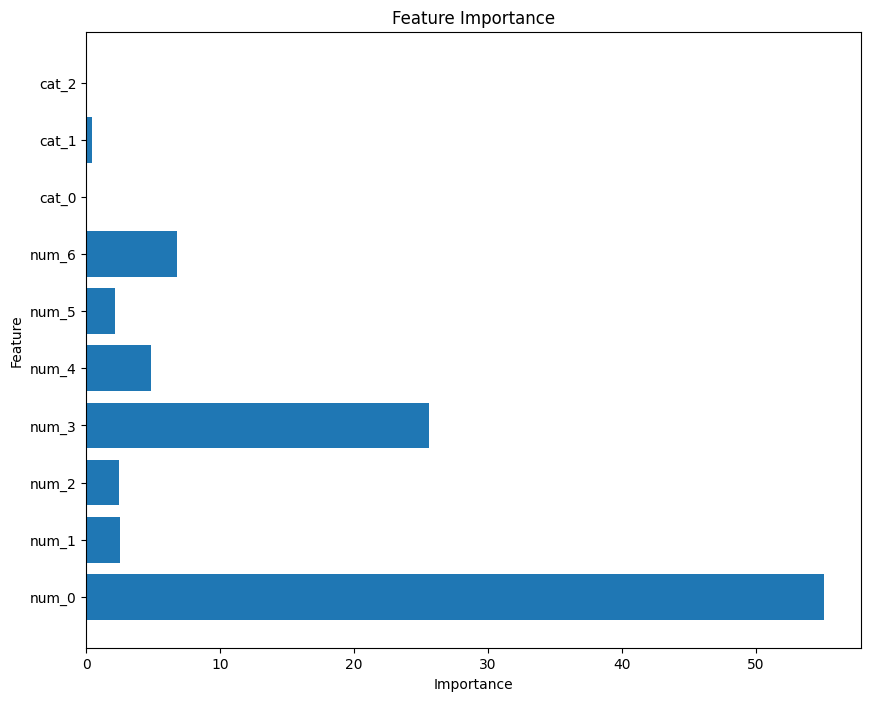

In [7]:
model.plot_feature_importance()